In [ ]:
https://www.kaggle.com/code/gauravkumar462/simplest-mnist-digit-recognizer-with-99-accuracy

In [ ]:
!unzip archive.zip

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import os
import struct
from array import array

In [4]:
for dirname, _, filenames in os.walk('kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

kaggle/t10k-labels.idx1-ubyte
kaggle/train-labels.idx1-ubyte
kaggle/train-images.idx3-ubyte
kaggle/t10k-images.idx3-ubyte
kaggle/train-images-idx3-ubyte/train-images-idx3-ubyte
kaggle/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte
kaggle/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte
kaggle/train-labels-idx1-ubyte/train-labels-idx1-ubyte


In [5]:
class MnistDataloader(object):
    # tif : training images file path
    # tlf : training labels file path
    # test_i_f : test image file path
    # test_l_f : test labels file path
    def __init__(self, tif,tlf, test_i_f, test_l_f):
        self.tif = tif
        self.tlf = tlf
        self.test_i_f = test_i_f
        self.test_l_f = test_l_f

    def read_images_labels(self, images_file_path, labels_file_path):
        labels = []
        with open(labels_file_path, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number not matching, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())

        with open(images_file_path, 'rb') as file:
            magic, size, rows, columns = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number not matching, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())
        images = []
        for i in range(size):
            images.append([0] * rows * columns)
        for i in range(size):
            img = np.array(image_data[i * rows * columns:(i + 1) * rows * columns])
            img = img.reshape(28, 28)
            images[i][:] = img

        return np.array(images), np.array(labels)

    def load_data(self):
        x_train, y_train = self.read_images_labels(self.tif, self.tlf)
        x_test, y_test = self.read_images_labels(self.test_i_f, self.test_l_f)
        return (x_train, y_train),(x_test, y_test)

In [13]:
tif = 'kaggle/train-images.idx3-ubyte'
tlf = 'kaggle/train-labels.idx1-ubyte'
test_i_f = 'kaggle/t10k-images.idx3-ubyte'
test_l_f = 'kaggle/t10k-labels.idx1-ubyte'

In [14]:
mnist_dataloader = MnistDataloader(tif, tlf, test_i_f, test_l_f)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

In [15]:
x_train.shape

(60000, 28, 28)

In [16]:
x_train = x_train/255.
x_test = x_test/255.

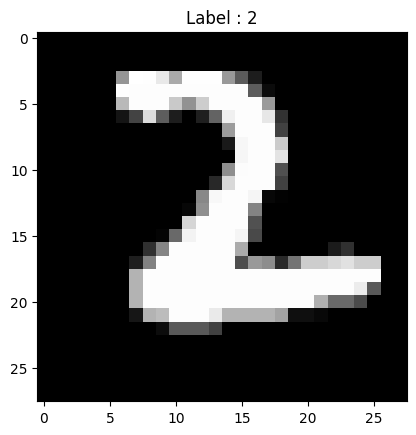

In [19]:
for i in range(10):
    r = np.random.randint(60000)
    pt.imshow(x_train[r], cmap = pt.cm.gray)
    pt.title("Label : "+str(y_train[r]))

In [20]:
x_test.shape

(10000, 28, 28)

In [21]:
from keras.utils import to_categorical
x_train = np.array([x.flatten() for x in x_train])
y_train = np.array([to_categorical(y, 10) for y in y_train])

x_test = np.array([x.flatten() for x in x_test])
y_test = np.array([to_categorical(y, 10) for y in y_test])

In [22]:
x_test.shape

(10000, 784)

In [23]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [24]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dropout

In [26]:
model = Sequential()

In [27]:
model.add(Convolution2D(128, kernel_size = (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.1))

model.add(Convolution2D(64, kernel_size = (3, 3)))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(25, activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(10, activation = 'softmax'))

In [28]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [29]:
model.fit(x_train, y_train,
         validation_data=(x_test, y_test),
         epochs = 7)

Epoch 1/7
1875/1875 [==============================] - 110s 58ms/step - loss: 0.2008 - accuracy: 0.9384 - val_loss: 0.0627 - val_accuracy: 0.9819
Epoch 2/7
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0707 - accuracy: 0.9794 - val_loss: 0.0495 - val_accuracy: 0.9846
Epoch 3/7
1875/1875 [==============================] - 100s 53ms/step - loss: 0.0546 - accuracy: 0.9843 - val_loss: 0.0370 - val_accuracy: 0.9888
Epoch 4/7
1875/1875 [==============================] - 100s 53ms/step - loss: 0.0459 - accuracy: 0.9866 - val_loss: 0.0338 - val_accuracy: 0.9894
Epoch 5/7
1875/1875 [==============================] - 99s 53ms/step - loss: 0.0361 - accuracy: 0.9893 - val_loss: 0.0342 - val_accuracy: 0.9898
Epoch 6/7
1875/1875 [==============================] - 97s 52ms/step - loss: 0.0301 - accuracy: 0.9905 - val_loss: 0.0285 - val_accuracy: 0.9911
Epoch 7/7
1875/1875 [==============================] - 98s 52ms/step - loss: 0.0295 - accuracy: 0.9909 - val_loss: 0.0329 - va

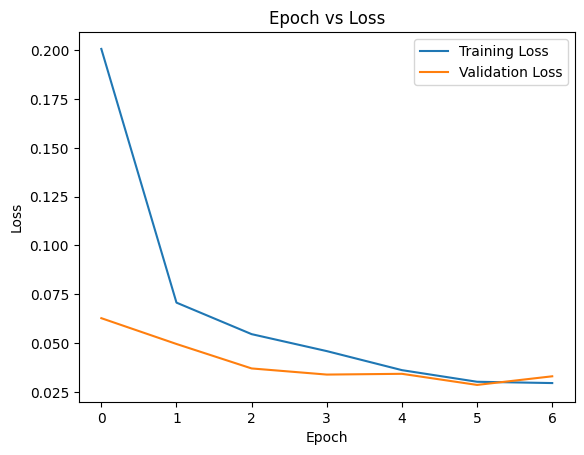

In [30]:
score = model.history.history
pt.title("Epoch vs Loss")
pt.xlabel("Epoch")
pt.ylabel("Loss")
pt.plot(model.history.epoch, score['loss'], label = 'Training Loss')
pt.plot(model.history.epoch, score['val_loss'], label = 'Validation Loss')
pt.legend()
pt.show()

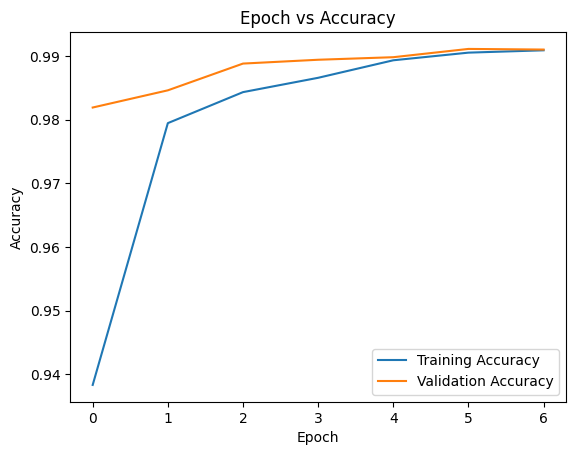

In [31]:
score = model.history.history
pt.title("Epoch vs Accuracy")
pt.xlabel("Epoch")
pt.ylabel("Accuracy")
pt.plot(model.history.epoch, score['accuracy'], label = 'Training Accuracy')
pt.plot(model.history.epoch, score['val_accuracy'], label = 'Validation Accuracy')
pt.legend()
pt.show()

In [32]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 6s 21ms/step - loss: 0.0329 - accuracy: 0.9910


[0.03294621780514717, 0.9909999966621399]

313/313 [==============================] - 7s 21ms/step


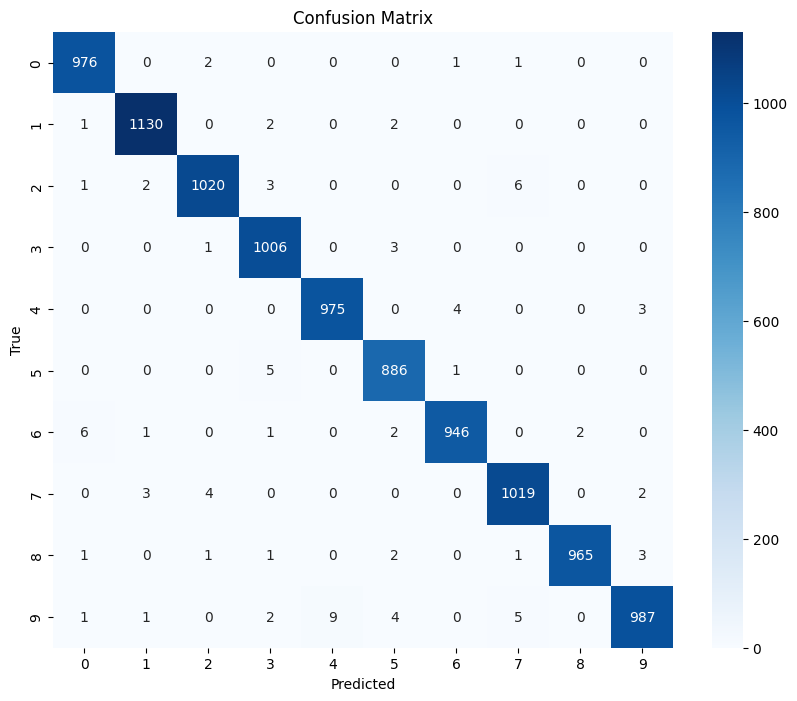

Accuracy: 99.10%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have a trained model called 'model' that predicts labels
# You need to replace 'model.predict' with the actual prediction function of your model

# Make predictions on the test set
y_pred = model.predict(x_test)

# Convert one-hot encoded labels to integers (if needed)
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print accuracy and classification report
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print('\nClassification Report:')
print(classification_report(y_true, y_pred, target_names=[str(i) for i in range(10)]))